In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

In [2]:
df=pd.read_csv("E://Programs/MACHINE LEARNING WITH PYTHON-GLOBSYN/datasets/startups.csv")

In [6]:
df.rename(columns={"R&D Spend":"rd","Administration":"adm","Marketing Spend":"mark","State":"st","Profit":"profit"},inplace=True)

In [8]:
df

,rd,adm,mark,st,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [9]:
df.st.value_counts()

California    17
New York      17
Florida       16
Name: st, dtype: int64

In [10]:
df.describe()

,rd,adm,mark,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [14]:
df[(df["rd"]==0) | (df["mark"]==0)]

,rd,adm,mark,st,profit
19,86419.70,153514.11,0.00,New York,122776.86
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [13]:
df.drop(47,inplace=True)

In [20]:
st_grp=df.groupby("st").max()

In [27]:
df.groupby("st")["rd"].mean()

st
California    68698.778750
Florida       80724.016250
New York      76195.062353
Name: rd, dtype: float64

In [30]:
ser=pd.Series([10,12,13],index=["a","b","c"])

In [31]:
d=dict(ser)

In [32]:
d


{'a': 10, 'b': 12, 'c': 13}

In [33]:
rd_dict=dict(df.groupby("st")["rd"].mean())
rd_dict

{'California': 68698.77874999998,
 'Florida': 80724.01624999999,
 'New York': 76195.06235294118}

In [36]:
mark_dict=dict(df.groupby("st")["mark"].mean())
mark_dict

{'California': 193949.7375,
 'Florida': 247323.55124999996,
 'New York': 205346.01588235298}

In [43]:
for index,record in df.iterrows():
    if record["rd"] == 0:
        df["rd"][index]=rd_dict[record["st"]]
    if record["mark"] == 0:
        df["mark"][index]=rd_dict[record["st"]]    

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [44]:
df[(df["rd"]==0) | (df["mark"]==0)]

,rd,adm,mark,st,profit


In [45]:
# we won't include state in our first implementation
df1=df.drop("st",axis=1)

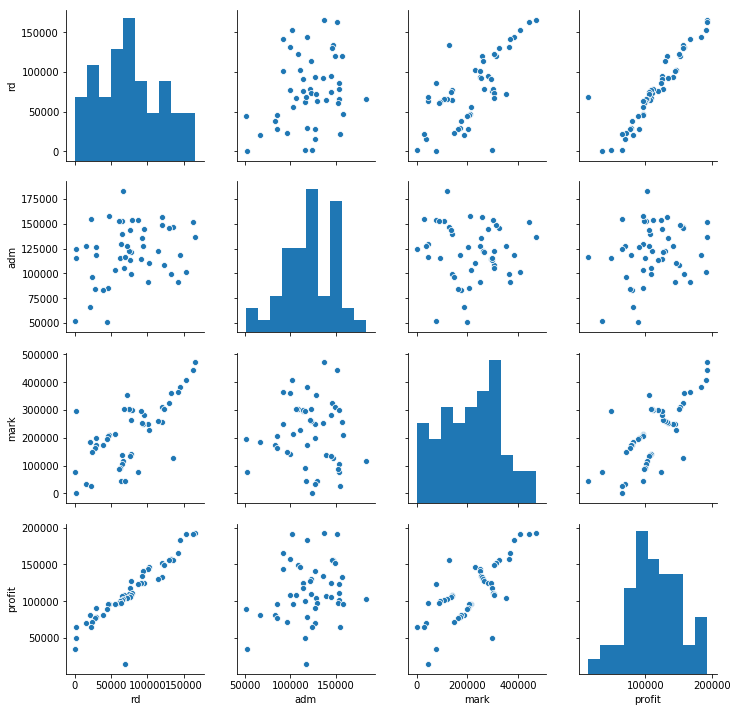

In [46]:
sns.pairplot(df1)

In [49]:
df1.corr()["profit"].sort_values(ascending=False)

profit    1.000000
rd        0.919260
mark      0.737966
adm       0.226442
Name: profit, dtype: float64

In [54]:
df1[["rd","adm","mark"]].corr()

,rd,adm,mark
rd,1.000000,0.270151,0.690471
adm,0.270151,1.000000,-0.033251
mark,0.690471,-0.033251,1.000000


In [76]:
X=df1.drop("profit",axis=1)
y=df1["profit"]

In [77]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.15,random_state=42)

In [78]:
model=linear_model.LinearRegression()

In [79]:
model.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
yhat=model.predict(Xtest)

In [81]:
print("Training score : ",model.score(Xtrain,ytrain))

Training score :  0.8558194349469539


In [83]:
print("Test score : ",model.score(Xtest,ytest))

Test score :  0.8643914335072637


In [86]:
np.sqrt(metrics.mean_squared_error(ytest,yhat))

11728.692115589769

In [87]:
#this is tedious to do this all over again so we are gonna write a function to autoamte the thigns for us


In [96]:
def process(_Xtrain,_ytrain,_Xtest,_ytest):
    model = linear_model.LinearRegression()
    model.fit(_Xtrain,_ytrain)
    yhat_test=model.predict(_Xtest)
    yhat_train=model.predict(_Xtrain)
    print("SCORE :",model.score(_Xtrain,_ytrain))
    print(_Xtrain.columns.values)
    print("TRAIN RMSE :",np.sqrt(metrics.mean_squared_error(_ytrain,yhat_train)))
    print("TEST RMSE :",np.sqrt(metrics.mean_squared_error(_ytest,yhat_test)))


In [97]:
process(Xtrain,ytrain,Xtest,ytest) #includes administration

SCORE : 0.8558194349469539
['rd' 'adm' 'mark']
TRAIN RMSE : 14832.154611227448
TEST RMSE : 11728.692115589769


In [98]:
Xtrain1=Xtrain[["rd","mark"]]
Xtest1=Xtest[["rd","mark"]]

In [99]:
process(Xtrain1,ytrain,Xtest1,ytest) # Does not include administration

SCORE : 0.8557609510231474
['rd' 'mark']
TRAIN RMSE : 14835.162487679305
TEST RMSE : 11832.822283670856


In [101]:
df1["perc_adm"]=df1.adm/(df1.rd+df1.adm+df1.mark)


In [105]:
df1["perc_adm"].describe()

count    49.000000
mean      0.333124
std       0.163174
min       0.152404
25%       0.232960
50%       0.279583
75%       0.402732
max       0.977143
Name: perc_adm, dtype: float64

In [ ]:
confidence interval 
p-values
f distribution
h0 null hypothesis
chi square distribution
aNnova (analysis of variance)testing